In [3]:
# NETFLIX DATA VISUALIZATION PROJECT

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


In [20]:
df=pd.read_csv('netflix_titles.csv')

def check_data(df):
    print("Shape:", df.shape)
    print("\nData Types:\n", df.dtypes)
    print("\nMissing Values:\n", df.isnull().sum())

check_data(df)


Shape: (8807, 12)

Data Types:
 show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

Missing Values:
 show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64


In [21]:
def clean_data(df):
    
    df['date_added'] = df['date_added'].str.strip()  # Remove leading/trailing spaces
    df['date_added'] = pd.to_datetime(df['date_added'])  # Now safe to convert


    # Fill null values
    df['duration'] = df['duration'].fillna('0 min')
    df.dropna(subset=['title'], inplace=True)
    df['director'] = df['director'].fillna('unknown')
    df['cast'] = df['cast'].fillna('Not specified')
    df['country'] = df['country'].fillna('unknown')
    df['rating'] = df['rating'].fillna(df['rating'].mode()[0])
    df['duration'] = df['duration'].fillna('0 min')
    df['date_added'] = df['date_added'].fillna('Unknown')

    

    return df

df = clean_data(df)
df.head()


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Not specified,United States,2021-09-25 00:00:00,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24 00:00:00,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",unknown,2021-09-24 00:00:00,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,unknown,Not specified,unknown,2021-09-24 00:00:00,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24 00:00:00,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [22]:
df.isnull().sum()


show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [24]:
def top_countries(df):
    print(f"Top 5 Countries: \n {df['country'].value_counts().head()}")

top_countries(df)

Top 5 Countries: 
 country
United States     2818
India              972
unknown            831
United Kingdom     419
Japan              245
Name: count, dtype: int64


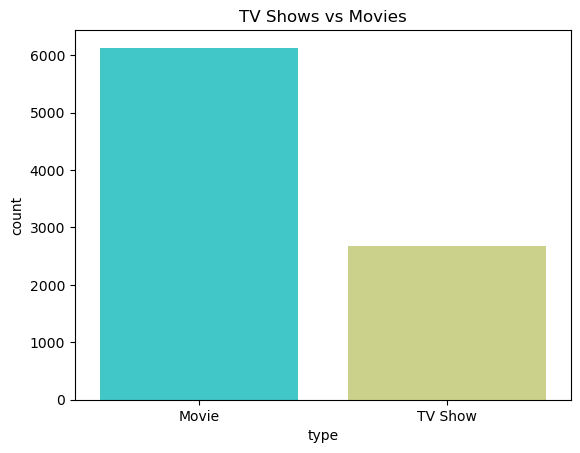

In [33]:
def plot_type_distribution(df):
    sns.countplot(x='type',data=df ,palette='rainbow',hue='type')
    plt.title("TV Shows vs Movies")
    plt.show()
plot_type_distribution(df)

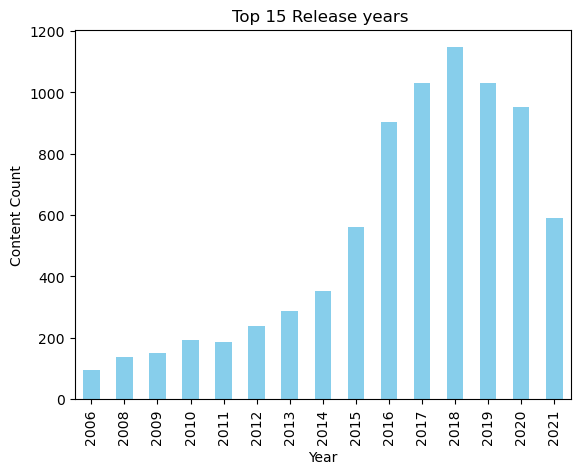

In [36]:
def plot_release_years(df):
    df['release_year'].value_counts().head(15).sort_index().plot(kind='bar',color='skyblue')
    plt.title("Top 15 Release years ")
    plt.xlabel("Year")
    plt.ylabel('Content Count')
    plt.show()
plot_release_years(df)

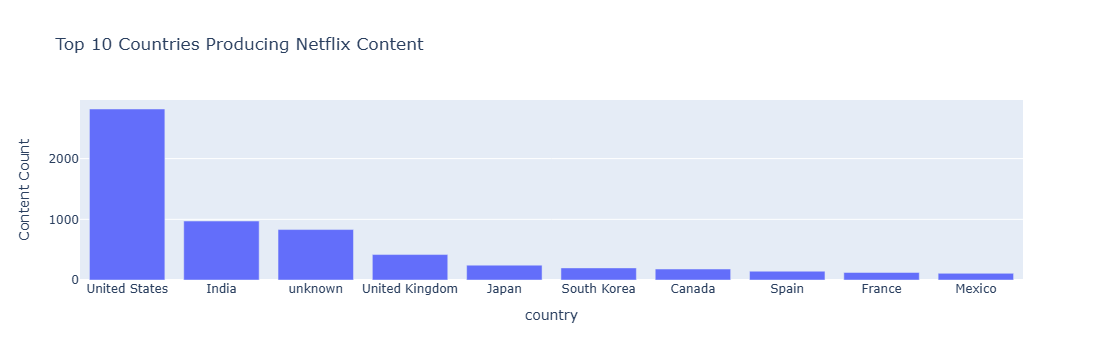

In [41]:
def plot_country_content(df):
    top_countries=df['country'].value_counts().head(10)
    fig=px.bar(x=top_countries.index,y=top_countries.values,labels={'x':'country','y':'Content Count'},title="Top 10 Countries Producing Netflix Content")
    fig.show()
plot_country_content(df)

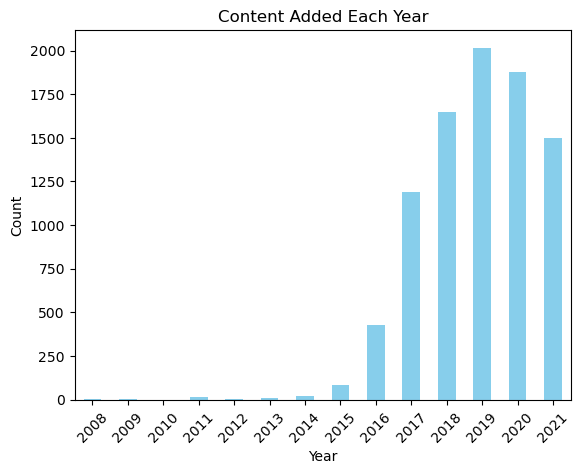

In [48]:
def plot_year_added(df):
    df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')

    df['year_added'] = df['date_added'].dt.year


    year_counts = df['year_added'].dropna().astype(int).value_counts().sort_index()

    year_counts.plot(kind='bar', color='skyblue')
    plt.title("Content Added Each Year")
    plt.xlabel("Year")
    plt.ylabel("Count")
    plt.xticks(rotation=45) 
    plt.show()
plot_year_added(df)

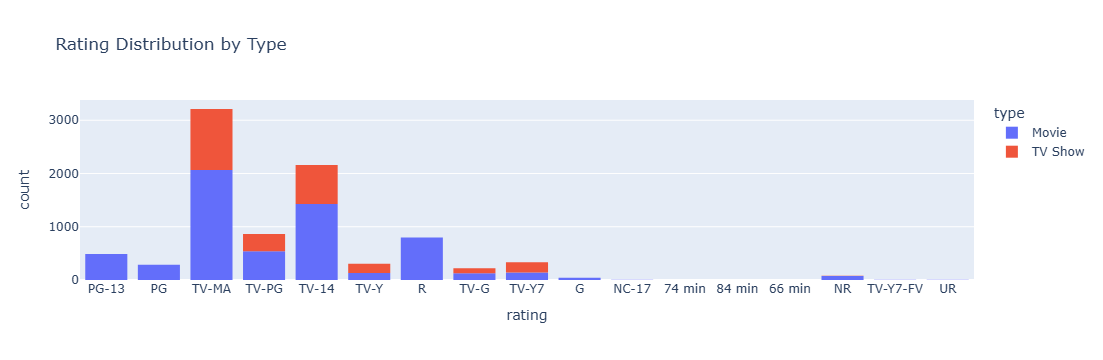

In [49]:
def plot_rating_distribution(df):
    fig= px.histogram(df,x='rating',color='type',title='Rating Distribution by Type')
    fig.show()
plot_rating_distribution(df)

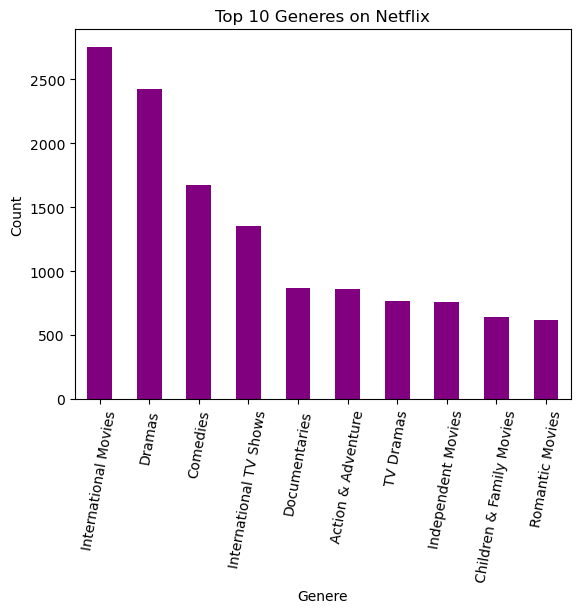

In [57]:
def top_generes(df):
    generes=df['listed_in'].str.split(', ',expand=True).stack().value_counts().head(10)
    generes.plot(kind='bar',color='purple')
    plt.title("Top 10 Generes on Netflix")
    plt.xlabel("Genere")
    plt.ylabel("Count")
    plt.xticks(rotation=80) 
    plt.show()
top_generes(df)
    